In [218]:
!find ../../../workspace -type d -name ".ipynb_checkpoints" -exec rm -rf {} +

In [141]:
!python3 rename.py

In [219]:
!python3 run_example_designs.py --architecture simple_output_stationary --problem CONV/UndilatedDeepLabv3



Running mapper for target simple_output_stationary in /home/workspace/final-project/example_designs/example_designs/simple_output_stationary/outputs/UndilatedDeepLabv3_layer22...


Running mapper for target simple_output_stationary in /home/workspace/final-project/example_designs/example_designs/simple_output_stationary/outputs/UndilatedDeepLabv3_layer5...


Running mapper for target simple_output_stationary in /home/workspace/final-project/example_designs/example_designs/simple_output_stationary/outputs/UndilatedDeepLabv3_layer34...


Running mapper for target simple_output_stationary in /home/workspace/final-project/example_designs/example_designs/simple_output_stationary/outputs/UndilatedDeepLabv3_layer18...


Running mapper for target simple_output_stationary in /home/workspace/final-project/example_designs/example_designs/simple_output_stationary/outputs/UndilatedDeepLabv3_layer59...


Running mapper for target simple_output_stationary in /home/workspace/final-project/example_de

In [268]:
import re
import os
import matplotlib.pyplot as plt
import numpy as np

def extract_numbers_from_lines(file_path, string):
     with open(file_path, 'r') as file:
        for line in file:
            if string in line:
                number_match = re.search(r'\d+\.\d+', line)
                if number_match:
                    return float(number_match.group())
            if string in line:
                number_match = re.search(r'\d+', line)
                if number_match:
                    return int(number_match.group())

def extract_layer_number(filename):
    return int(re.search(r'r(\d+)', filename).group(1))

file_dir1 = 'example_designs/eyeriss_like/outputs_DeepLabv3/'
file_dir2 = 'example_designs/eyeriss_like/outputs_UndilatedDeepLabv3/'
def get_data(string):
    data_dir1 = []
    data_dir2 = []

    dir1 = os.listdir(file_dir1)
    dir2 = os.listdir(file_dir2)

    file_ls1 = sorted(dir1, key=extract_layer_number)
    file_ls2 = sorted(dir2, key=extract_layer_number)

    for file in file_ls1:
        file += '/timeloop-mapper.stats.txt'
        path = os.path.join(file_dir1, file)
        data_dir1.append(extract_numbers_from_lines(path, string))

    for file in file_ls2:
        file += '/timeloop-mapper.stats.txt'
        path = os.path.join(file_dir2, file)
        data_dir2.append(extract_numbers_from_lines(path, string))

    # print(data_dir1)
    # print(data_dir2)
    return data_dir1, data_dir2


# fJ/compute metrics
strings = ["mac                                           ", "psum_spad                                     ",  "weights_spad                                  ", \
           "ifmap_spad                                    ", "shared_glb                                    ", "DRAM                                          ", \
           "Total                                         "]

strings = ["GFLOPs (@1GHz):", "Utilization:", "Cycles:", "Energy:", "EDP(J*cycle):"]
labels = ["GFLOPs (@1GHz)", "Utilization (%)", "Cycles", "Energy (uJ)", "EDP (J*cycle)"]
archs = ["eyeriss_like", "simple_weight_stationary", "simple_output_stationary"]

colors = plt.cm.tab20(np.linspace(0, 1, len(strings) * 2))

def graph_data(data_dir1, data_dir2, string, arch, color1=None, color2=None):
    x_values = np.array(range(len(data_dir1)))
    label = labels[strings.index(string)]
    string = re.sub(r' (?=\s*$)', '', string)
    
    timeframe = 10
    data_dir1 = data_dir1[-timeframe:]
    data_dir2 = data_dir2[-timeframe:]
    x_values = x_values[-timeframe:]

    if color1 is None or color2 is None:
        plt.plot(x_values, np.array(data_dir1), color=color1, label="DL " + arch)
        plt.plot(x_values, np.array(data_dir2), color=color2, label="UDL " + arch)
    else:
        plt.plot(x_values, np.array(data_dir1), label="DL " + arch)
        plt.plot(x_values, np.array(data_dir2), label="UDL " + arch)
    plt.xlabel('Layer')

    if label == "GFLOPs (@1GHz)":
        plt.legend(fontsize="10", loc="upper left")

    if label == "Energy (uJ)" or label == "Cycles":
        plt.yscale('log')
        label = "log " + label
    
    plt.ylabel(label)
        

def loop_graph():
    for i, string in enumerate(strings[0:1]):
        data_dir1, data_dir2 = get_data(string)
        graph_data(data_dir1, data_dir2, string, colors[i], colors[i + len(strings)])
        plt.legend(fontsize="6", loc="upper left")
        plt.show()

def loop_archs_graph():
    for string in strings:
        all_feed1 = []
        all_feed2 = []
        for arch in archs:
            feed1 = []
            feed2 = []
            file_dir1 = f"example_designs/{arch}/outputs_DeepLabv3"
            file_dir2 = f"example_designs/{arch}/outputs_UndilatedDeepLabv3"
            data_dir1 = sorted(os.listdir(file_dir1), key=extract_layer_number)
            data_dir2 = sorted(os.listdir(file_dir2), key=extract_layer_number)
            
            for layer_num in range(len(data_dir1)):
                file_path = file_dir1 + '/' + data_dir1[layer_num] + '/timeloop-mapper.stats.txt'
                feed1.append(extract_numbers_from_lines(file_path, string))
                file_path = file_dir2 + '/' + data_dir2[layer_num] + '/timeloop-mapper.stats.txt'
                feed2.append(extract_numbers_from_lines(file_path, string))
            
            all_feed1.append(feed1)
            all_feed2.append(feed2)
    
        for feed1, feed2, arch in zip(all_feed1, all_feed2, archs):
            graph_data(feed1, feed2, string, arch)
        plt.show()

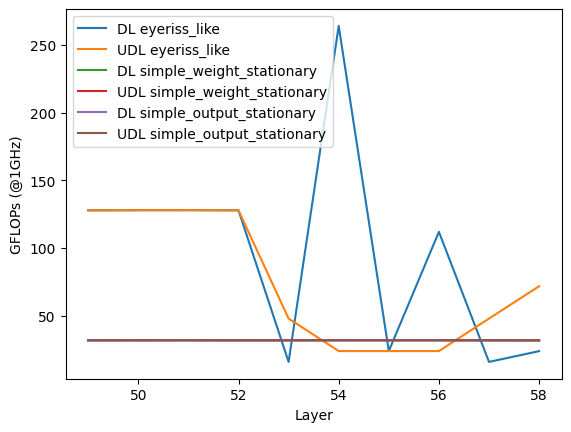

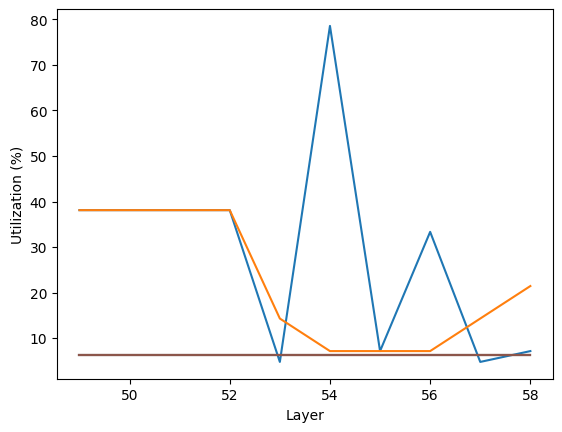

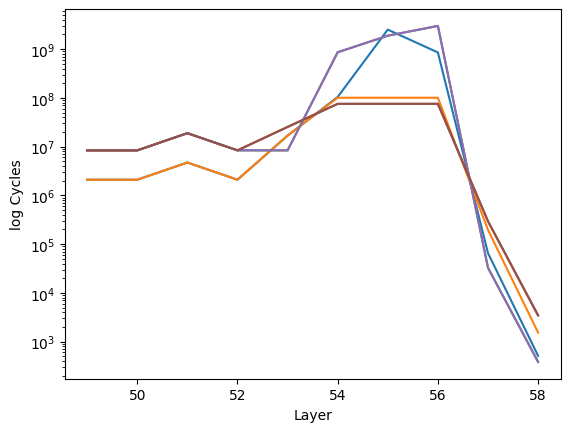

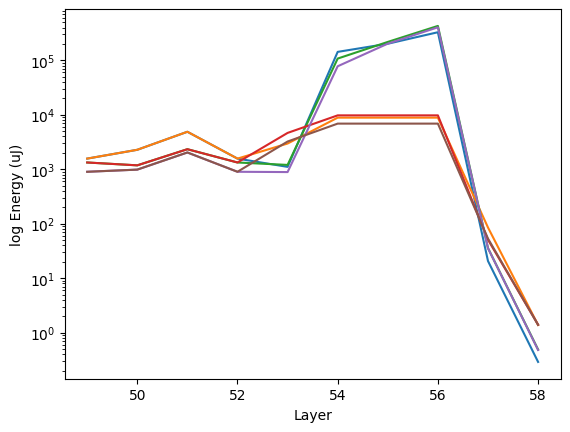

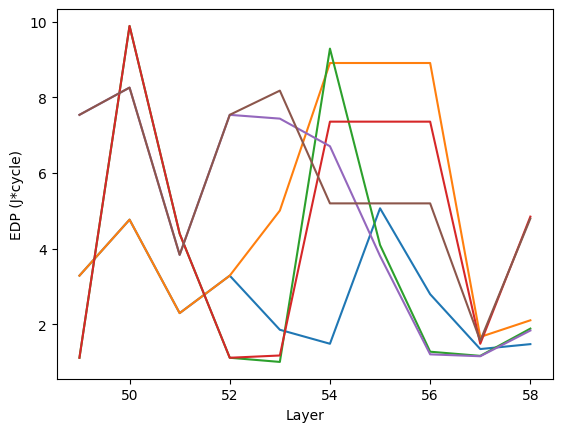

In [269]:
# loop_graph()
loop_archs_graph()